In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
insurance_df = pd.read_csv('Course Materials/Data/insurance.csv') #.sample(1_000)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
X = sm.add_constant(insurance_df[['age','bmi','children']])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           8.80e-37
Time:                        18:51:15   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para cada 1 ano, o preço do seguro aumento 241.93 doláres.

<Axes: ylabel='None'>

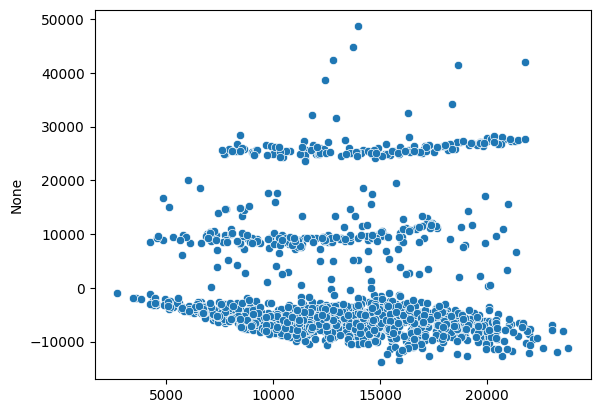

In [26]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [27]:
new_data = pd.DataFrame({
    'age': [0, insurance_df['age'].min(), insurance_df['age'].mean(), insurance_df['age'].max()],
    'bmi': [0, insurance_df['bmi'].min(), insurance_df['bmi'].mean(), insurance_df['bmi'].max()],
    'children': [0, insurance_df['children'].min(), insurance_df['children'].mean(), insurance_df['children'].max()],
})

new_data

,age,bmi,children
0,0.000000,0.000000,0.000000
1,18.000000,15.960000,0.000000
2,39.207025,30.663397,1.094918
3,64.000000,53.130000,5.000000


In [28]:
X = sm.add_constant(new_data)

model.predict(X)

0    -6916.243348
1     2703.707687
2    13270.422265
3    28801.315424
dtype: float64